# Encyclopaedia Britannica 1

## Instructions on running notebook

* Ensure `pandas`, `numpy`, `re`, `seaborn`, `matplotlib` and `wordcloud` are installed
* Download "Just the text" from https://data.nls.uk/data/digitised-collections/encyclopaedia-britannica/
* Once extracted, rename the folder to `text`
* Remove the `readme.txt` file, and put the `encyclopaediaBritannica-inventory.csv` file in the same folder than the notebook, so that the file structure looks like:
    - Vaida_CW2.ipynb
    - encyclopaediaBritannica-inventory.csv
    - text folder (txt files inside)


## Overview

Our dataset is the original OCR of the Encyclopaedia Britannica, spanning eight editions, which were released between 1768 and 1860. Encyclopaedias are meant to be a collection of general knowledge-- the front page states the Encyclopaedia Britannica as being a "Dictionary of Arts and Sciences". It is an interesting dataset as it can be used how knowledge has changed over time, whether it is words that have been added, or definitions that have changed, with relation to topics that were being explored at the time.

The OCR has not been cleaned up. We decided to work with the plaintext version, which contains only the OCRed text, without the positional/size information. The data is a series of `.txt` files, covering the eight editions: this means it is completely unstructured textual data.

Apart from additional content such as a cover page, errata (corrections at the end of the volume), and preface/list of authors in the first volume of an edition, the encyclopaedia is structured as follows:
* explanations/descriptions of entries, sorted alphabetically. An example entry: `ABSURD, an epithet for any thing that contradidls an apparent truth.` These can be a single sentence, to several pages of explanation.
* longer-form articles, that cover broader fields such as `AGRICULTURE` or `ALGEBRA`, in which case they are structured in parts & sections, with annotations of figures in illustrated pages (plates), formulae, etc.
* Illustrated pages (plates), which are not included in the plaintext version
* Pages are numbered, and there are headers for what part of the alphabet (or article, if on long-form article) you are on

The OCR is quite noisy, with spelling mistakes such as:
* most predominantly, s being interpreted as f: `a fpecies of compofition`
* other mistakes of letters being misinterpreted as other letters or punctuation symbols, such as `fubjedt` (subject)
* Headers, cursive sub-headers and drop caps (first letter/word being bigger in a paragraph) are also badly recognised
* Some noise that registers as random punctuation

An example segment presenting what the original dataset looks like is presented in the general description below.

In [61]:
# Read in volume

f = open('text/144133901.txt', 'r', encoding="utf8")
test_vol = f.read()
f.close()

print("Initial length: " + str(len(test_vol)))
test_vol_clean = clean_up(test_vol)
print("New length: " + str(len(test_vol_clean)))

Initial length: 3876195
New length: 3866738


In [62]:
re.findall('([A-Z][A-Z]+(?=\s[A-Z])(?:\s[A-Z][A-Z]+)+)', test_vol_clean)

['ENCYCLOPEDIA BRITANNICA',
 'COVI PILED UPON',
 'NEW PLAN',
 'IN WHICH',
 'ILLUSTRATED WITH ONE HUNDRED AND SIXTY COPPERPLATES',
 'IN THREE VOLUME',
 'PREFACE\nUTILITY',
 'ABAC AY',
 'AB ACOA',
 'ABB\nABASCIA',
 'AB ATOR',
 'ABU SAN',
 'AC AC IANS',
 'AC ANUS',
 'AC ARA',
 'ACC\nACCOMPTANT',
 'ACE\nACCOUNTANT',
 'ACOL ASTRE',
 'AD ARGON',
 'AD ARTICULATION',
 'ADD ACE',
 'ADENOGR APHY',
 'ADI\nADERBERG',
 'ADM\nADMINICULATOR',
 'AD SI DELL',
 'AD VENTREM',
 'AD VOU',
 'JEN GMATOGRAPHY',
 'ESTIM ATIQ',
 'AG AG',
 'AG HER',
 'AGI STALIA',
 'AGO\nAGOGE',
 'PART\nAGRICULTURE',
 'PART II',
 'AID\nAGYRT',
 'AIM ARGUES',
 'AIR\nAIPIMIXIRA',
 'AL ANTE JO',
 'ALA\nALAPOULI',
 'ALB\nALBANUM',
 'ALE\nALDERNEY',
 'PROBLEM II',
 'PROBLEM III',
 'PROBLEM IV',
 'PROBLEM VI',
 'LEM VII',
 'PROBLEM VIII',
 'IOOOO IOO',
 'THEOREM II',
 'THEOREM II',
 'THEOREM III',
 'ALKALIZ ATION',
 'ALL\nALLIGATOR',
 'ALL\nALLOCUTION',
 'ALA\nALMANZA',
 'ALPHONSINE TABLES',
 'ALU CO',
 'ALU\nALVEUS',
 'AM AD AN',
 'A

In [1]:
# check that I can run whole notebook, esp on noteable


# change first viz to have by vol?

# regex for multiple-word entries (check for "MARTIAL LAW"): just mention

# most referenced entries:
# mentioning that doing an all lowercase/capitalised rather than header search for them could be useful
# same for above viz, making content all lowercase first aggregate words

# Distribution of lengths of definitions in first edition:
# make into words rather than characters

In [2]:
# subset cleaning: 
# remove duplicates?
# clean up if:
# definition is shorter than x characters, or mostly noise

In [3]:
# cleaning of first ed
# duplicates
# complex words
# find_def: it only takes simple words, and also only finds the very first instance of word (what about duplicate instances idk assumes first is the relevant one)
# first, not remove outliers as these could be longer & valid articles (show example) and just visualise very small section

In [4]:
# from https://stackoverflow.com/questions/9525993/get-consecutive-capitalized-words-using-regex
re.findall('([A-Z][A-Z]+(?=\s[A-Z])(?:\s[A-Z][A-Z]+)+)', test_vol_clean) # consecutive capitalised words (eg. BREW HOUSE)

# FOR NOW WE ASSUME SINGLE WORDS

## General description

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
# reading in index file

inventory = pd.read_csv("encyclopaediaBritannica-inventory.csv", header=None)
inventory.columns = ['file','volume']
# print(inventory)
print("\nNumber of text files: " + str(len(inventory)))


Number of text files: 195


In [3]:
# printing an example of the structure of the data and noise

print("Example of entries:\n")

f = open('text/' + inventory.iloc[0].file, 'r', encoding="utf8")
content = f.read()
f.close()
print(content[51200:51500])

print("\n##########################################################")
print("\nExample of noise:\n")

print(content[200:500])

Example of entries:

.
ABSURDITY, the name of an abfurd addon or fenti-
ment.
ABSUS, in botany, the trivial name of a fpecies of the.;
caffia. i-'' Js”
ABSYNTHfUM. See Absinthium.
ABUAI, one of the Philippine ifles. See Philipptne.
ABUCCO, Abocco, or Aboochi, a. weight ufed in
the'kingdom of Pegu, equal to i cRteCcaiis 

##########################################################

Example of noise:

*c CclU^K <77t .
yy*t4**2^t*-C{+r ^tXCe^vK &v»w
8/y: t^cCv-yt^yA. *-? ^v. •^GL* ftc*frt
* U^>. ‘
** a^yUf^yX ^
}tA£. yylrrCj? yu>t f\ ^^2!
ENCYCLOPEDIA BRITANNICA.
VOLUME the FIRST.
**■*
'
,T S :u -I >;j .1 M U a C V'
.
A
ARTS and SCIENCES,
COVI PILED UPON A NEW PLAN.
IN WHICH
The diferent Sciences 


In [4]:
# Reading in text files and generate word and length counts

lengths = []
words = []

for index, row in inventory.iterrows():
    # print("Reading: " + row['file'])
    
    f = open('text/' + row['file'], 'r', encoding="utf8")
    content = f.read()
    # print("Length: " + str(len(content)))
    lengths.append(len(content))
    
    words.append(len(content.split()))
    
    f.close()

In [5]:
# Assign to a DataFrame

full_inventory = inventory.assign(length=lengths)
full_inventory = full_inventory.assign(words=words)
full_inventory

,file,volume,length,words
0,144133901.txt,"Encyclopaedia Britannica; or, A dictionary of ...",3876195,703000
1,144133902.txt,"Encyclopaedia Britannica; or, A dictionary of ...",5518008,993096
2,144133903.txt,"Encyclopaedia Britannica; or, A dictionary of ...",4829230,871673
3,144850366.txt,"Encyclopaedia Britannica: or, A dictionary of ...",3914268,710507
4,144850367.txt,"Encyclopaedia Britannica: or, A dictionary of ...",5538435,995654
...,...,...,...,...
190,193108326.txt,"Encyclopaedia Britannica - Eighth edition, Vol...",6448411,1116652
191,193322701.txt,"Encyclopaedia Britannica - Eighth edition, Vol...",6734229,1164466
192,193469393.txt,"Encyclopaedia Britannica - Eighth edition, Vol...",6836261,1194897
193,193819047.txt,"Encyclopaedia Britannica - Eighth edition, Vol...",8029705,1388732


In [6]:
full_inventory.describe() # this provides some general statistics about our data

,length,words
count,1.950000e+02,1.950000e+02
mean,4.844365e+06,8.599402e+05
std,1.318219e+06,2.318644e+05
min,1.842523e+06,2.905590e+05
25%,4.460818e+06,7.799630e+05
50%,5.259720e+06,9.425200e+05
75%,5.525978e+06,9.798500e+05
max,8.029705e+06,1.388732e+06


**Note**: the word count is an approximation, as the OCR includes some noise.

In [7]:
print("Total length of all editions, in chars: " + str(np.sum(full_inventory['length'])))
print("Total length of all editions, in words: " + str(np.sum(full_inventory['words'])))

Total length of all editions, in chars: 944651187
Total length of all editions, in words: 167688341


In [8]:
print("Longest volume, by length in words: " + str(np.max(full_inventory['words'])))
list(full_inventory.loc[full_inventory['words'] == np.max(full_inventory['words'])].volume)

Longest volume, by length in words: 1388732


['Encyclopaedia Britannica - Eighth edition, Volume 21, T-ZWO - EB.16']

In [9]:
print("Shortest volume, by length in words: " + str(np.min(full_inventory['words'])))
list(full_inventory.loc[full_inventory['words'] == np.min(full_inventory['words'])].volume)

Shortest volume, by length in words: 290559


['Encyclopaedia Britannica - Seventh edition, General index - EB.15']

## Subset of data investigated

For this assignment, I decided to investigate the very first edition.

In [10]:
# selecting the first three volumes, which make up the first edition

first_ed = full_inventory[:3]
list(first_ed['volume']) # list() to print whole text

['Encyclopaedia Britannica; or, A dictionary of arts and sciences, compiled upon a new plan … - First edition, 1771, Volume 1, A-B - EB.1',
 'Encyclopaedia Britannica; or, A dictionary of arts and sciences, compiled upon a new plan … - First edition, 1771, Volume 2, C-L - EB.1',
 'Encyclopaedia Britannica; or, A dictionary of arts and sciences, compiled upon a new plan … - First edition, 1771, Volume 3, M-Z - EB.1']

In [12]:
print("FIRST EDITION")
print("Volumes: " + str(len(first_ed)))
print("Words: " + str(np.sum(first_ed['words'])))
print("Length in characters: " + str(np.sum(first_ed['length'])))

FIRST EDITION
Volumes: 3
Words: 2567769
Length in characters: 14223433


## Cleanup of data

Cleaning up OCRed text is a long process and is hard to get perfectly right, thus we do not focus on this step. Instead, we present some simple functions that could be used as a basis for text cleanup if it is required later/in a further assignment.

In [13]:
def replace_by(s, a, b):
    """ perform a regex replacement, prints number of occurrences found and returns a string.
    s: string to make changes in
    a: string to remove 
    b: string to add
    returns: a string"""
    
    # print("Replacing \"" + a + "\" by \"" + b + "\", found " + str(len(re.findall(a, s))) + "...")
    new = re.sub(a, b, s)
    
    return new

In [14]:
replace_by("This is a good dog!!!", "dog!!!", "cat")

'This is a good cat'

In [16]:
# Using regex cleanup ideas from: https://sites.temple.edu/tudsc/2014/08/12/text-scrubbing-hacks-cleaning-your-ocred-text/

# Further resources: https://programminghistorian.org/en/lessons/cleaning-ocrd-text-with-regular-expressions
# https://datascience.stackexchange.com/questions/20536/how-to-improve-ocr-scanning-results

def clean_up(s):
    """ Does a minimal cleanup of a string of text
    returns: a string
    """
    # print("Initial length: " + str(len(s)))
    s2 = replace_by(s, 'tbe', 'the')
    s3 = replace_by(s2, 'tiie', 'the')
    s4 = replace_by(s3, 'liis', 'his')
    s5 = replace_by(s4, 'bis', 'his')
    s6 = replace_by(s5, '■', '')
    s7 = replace_by(s6, 'ib','in') # was noticed by Ava in .txt files
    s8 = replace_by(s7, '¬','')
    s9 = replace_by(s8, '.(\.\.+)', '') # multiple periods; what about ellipsis though?
    # print("Clean up done!")
    return s9 # CAREFUL to always pass the right one to next, and return

## Analysis of edition 1

**Note:** due to the nature of the data (unclean OCR), most the analysis and operations performed will not capture the original data perfectly (eg. not capturing all the headers, definitions or references). However, we assume that a majority of the information will be captured, and that the errors made will roughly be the same in terms of proportions, so comparing counts will still make sense (that is, we expect to miss roughly the same number of matches from each regex search).

In [57]:
# Uses RegEx to identify the definition of a word as being the content between the uppercase word and the next uppercase word

def find_definition(word, volume):
    start = re.search(word, volume).start()
    start_next = re.search(word, volume).end()
    end = re.search("[A-Z][A-Z]+", volume[start_next:]).start()
    return volume[start_next+2:start_next+end] # +2 to ignore comma and space before a definition

In [58]:
# Extracts entries (headers), their definitions, their respective lengths, and all references ("See x") from an edition

def extract_info(edition):
    
    headers = []
    definitions = []
    refs = [] # for counting up all instances of "See x" in volumes  
    
    for index, row in edition.iterrows():
        current_headers = []
        
        print("Reading: " + row['file'])
        f = open('text/' + row['file'], 'r', encoding="utf8")
        content = f.read()
        content = clean_up(content) # check cleanup does something
        current_headers = re.findall('[A-Z][A-Z]+', content) # at least two uppercase letters following each other
        refs += re.findall('See [^,\.]*', content) # matches "See x" until a comma or a period
        
        for word in current_headers:
            definitions.append(find_definition(word, content))
            
        headers = headers + current_headers
        
        f.close()

    data = pd.DataFrame(headers, columns =['headers'])
    data['definition'] = definitions
    data['header_length']  = data['headers'].str.len()
    data['def_length']  = data['definition'].str.len()
    return data, refs

In [59]:
first_ed_data, refs = extract_info(first_ed) # this takes a couple minutes

Reading: 144133901.txt
Reading: 144133902.txt
Reading: 144133903.txt


In [60]:
first_ed_data.describe()

,header_length,def_length
count,29011.000000,29011.000000
mean,5.525766,303.493640
std,3.010584,1073.294442
min,2.000000,0.000000
25%,3.000000,10.000000
50%,5.000000,90.000000
75%,8.000000,216.000000
max,22.000000,25021.000000


In [23]:
first_ed_data[6000:6500] # example content

,headers,definition,header_length,def_length
6000,BELGRADE,"the capital of the province of Servia,\nin Eur...",8,174
6001,BELI,,4,0
6002,BELIEF,the affent of the mind to the truth of any\npr...,6,73
6003,BELL,,4,0
6004,BELL,,4,0
...,...,...,...,...
6495,BOCK,,4,0
6496,EAND,"in the Saxons time, is what we now call\nfreeh...",4,241
6497,BODKIN,"a fmall inftrument made of fteel, bone, ivo\nr...",6,216
6498,BODMIN,"a borough-town of Cornwall, about twenty-\nfix...",6,227


In [44]:
# Checking if two-letter headers seem to be mostly noise or not:
first_ed_data[first_ed_data['header_length'] < 3]

,headers,definition,header_length,def_length
0,UJ,^ (txk^L j 1rvt*Xitj\n$/i*4j/cJysx*£>Xb<. f^o,2,45
1,LZ,c^. % 'bvC,2,11
2,JJ,' }v*c CclU^K <77t .\nyy*t4**2^t*-C{+r ^t,2,40
3,XC,vK &v»w\n8/y: t^cCv-yt^yA. *-? ^v. •^,2,36
4,GL,ftc*frt\n* U^>. ‘\n** a^yUf^yX ^\n}tA£. yylrrC...,2,59
...,...,...,...,...
28965,TL,,2,0
28976,CH,he different Sciences and Arts are digefted in...,2,80
28992,CI,,2,0
29000,NA,,2,0


In [46]:
# What about three? There's a valid entry here for ZUG
first_ed_data[first_ed_data['header_length'] < 4]

,headers,definition,header_length,def_length
0,UJ,^ (txk^L j 1rvt*Xitj\n$/i*4j/cJysx*£>Xb<. f^o,2,45
1,LZ,c^. % 'bvC,2,11
2,JJ,' }v*c CclU^K <77t .\nyy*t4**2^t*-C{+r ^t,2,40
3,XC,vK &v»w\n8/y: t^cCv-yt^yA. *-? ^v. •^,2,36
4,GL,ftc*frt\n* U^>. ‘\n** a^yUf^yX ^\n}tA£. yylrrC...,2,59
...,...,...,...,...
28993,ZUG,"one of the cantons of Switzerland, is furround...",3,140
29000,NA,,2,0
29004,COR,,3,0
29009,II,\n,2,1


In [35]:
# Assertions to check some basic features of the data

first_ed_data[first_ed_data['def_length'] <= 0].empty, 'Definitions should not be negative or zero in length'

(False, 'Definitions should not be negative or zero in length')

From `describe()`, we see there are clearly very large values for `def_length`, even though the 75th percentile indicates a way lower value. We would probably want to check these outliers by hand, to see if it is a problem with our RegEx select not performing well on the noisy text, to decide whether to remove them.

There are also lots of empty definitions, or unrealistically short ones, that we should clean!

In [51]:
# Quick cleaning of data:
# realistically, a definition can't be shorter than 5 letters, even if it is simply a redirection of the form of "See x"
first_ed_clean = first_ed_data.loc[first_ed_data['def_length'] > 5]
# remove headers with two letters as they are probably mostly noise
first_ed_clean = first_ed_data.loc[first_ed_data['header_length'] > 2]

In [52]:
# Assertions to re-check some basic features of the data

first_ed_clean[first_ed_clean['def_length'] <= 0].empty, 'Definitions should not be negative or zero in length'
first_ed_clean[first_ed_clean['def_length'] < 5].empty, 'Definitions should not be shorter than five characters'
first_ed_clean[first_ed_clean['header_length'] < 3].empty, 'Headers should not be shorter than three characters'

(True, 'Headers should not be shorter than three characters')

In [53]:
first_ed_clean[6000:6500] # example output

,headers,definition,header_length,def_length
7154,BRANDRITH,"a trevet, or other iron utenfil, to fet\na vef...",9,67
7155,BRANDY,"a fpirituous and inflammable liquor, ex-\ntrad...",6,576
7156,BRANLIN,"in ichthyology, a fpecies of falmon, with\nfev...",7,124
7157,BRANSKA,"a town of Tranfilvania, fituated on the ri\nve...",7,91
7158,BRASEM,"in ichthyology, a ffth otherwife called aca-\n...",6,54
...,...,...,...,...
7691,HUNDRED,,7,0
7692,AND,"he various TfchnicalTervs, <&c. are expl-aiued...",3,91
7693,SIXTY,,5,0
7694,COPPERPLATES,.By Society of,12,15


## Visualisations

### Distribution of lengths of entries (headers) and definitions in first edition

In [26]:
first_ed_clean.describe()

,header_length,def_length
count,22318.000000,22318.000000
mean,6.179944,394.400349
std,2.963667,1208.974055
min,2.000000,6.000000
25%,4.000000,67.000000
50%,6.000000,131.000000
75%,8.000000,281.000000
max,22.000000,25021.000000


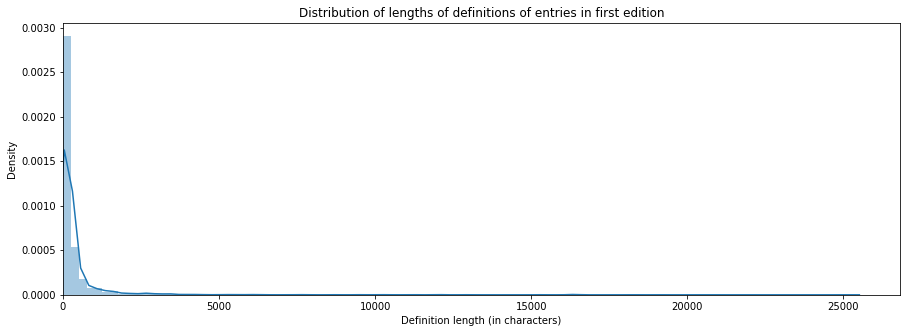

In [27]:
plt.figure(figsize=(15, 5))
chart = sns.distplot(first_ed_clean['def_length'], bins=100)
chart.set_title('Distribution of lengths of definitions of entries in first edition')
chart.set_xlabel("Definition length (in characters)")
chart.set_ylabel("Density")
plt.xlim(0)
plt.show()

From `describe()` we can see that the 75th percentile for `def_length` is 282, so I will regenerate the graph focusing on the smaller values to get a better look at the majority of the data.

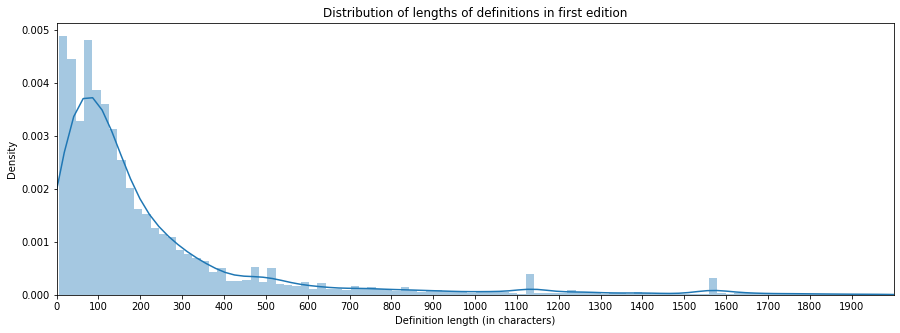

In [28]:
# 2000 chosen as most values seem to fall below it from the graph above
first_ed_short_descs = first_ed_clean.loc[first_ed_clean['def_length'] < 2000] 

plt.figure(figsize=(15, 5))
p = sns.distplot(first_ed_short_descs['def_length'], bins=100)
p.set_title('Distribution of lengths of definitions in first edition')
p.set_xlabel("Definition length (in characters)")
p.set_ylabel("Density")
p.set_xticks(np.arange(0,2000,100))
plt.xlim(0,2000)
plt.show()

We can see that the data takes the shape of a cut-off bell curve, with 75% of definitions falling below 282 characters, but there are various outliers that we can notice above 1000 characters, where a significant number of definitions fall within a bin. This could possibly be due to the noisiness in the data used or the bin size, or maybe there are some entries with a specific structure that have the same length.

We also notice a strange dip in the length of definitions at around 50 characters, which would need further investigation to explore. This might just be due to a lack of data, in which case we could check by visualising the lengths for all editions and seeing whether the dip gets smoothed out.

### Distribution of references to other entries in definitions

In [29]:
# find all references of the form of "See x" in definitions 

refs_in_desc = []

for index, row in first_ed_clean.iterrows():   
    refs_in_desc.append(len(re.findall('See [^,\.]*', row['definition']))) # matches "See x" until a comma or a period
    
first_ed_clean = first_ed_clean.assign(refs_in_desc=refs_in_desc)

first_ed_clean.describe()

,header_length,def_length,refs_in_desc
count,22318.000000,22318.000000,22318.000000
mean,6.179944,394.400349,0.222511
std,2.963667,1208.974055,0.469484
min,2.000000,6.000000,0.000000
25%,4.000000,67.000000,0.000000
50%,6.000000,131.000000,0.000000
75%,8.000000,281.000000,0.000000
max,22.000000,25021.000000,6.000000


In [30]:
# checking that it picks up what I want it to pick up correctly, through visual inspection

list(first_ed_clean.loc[first_ed_clean['refs_in_desc'] == 6].definition)[0] # should see 6 "See x"-type references

'in geometry, the ftraight line in a plain figure,\nabout which it revolves, to produce or generate a fo-\nlid : thus, if a femi-circle be moved round its diame\nter at reft, it will generate a fphere, the axis of which\nis that diameter.\nAxis, in aftronomy, is an imaginary right line fuppofed\nto pafs through the centre of the earth, and the hea\nvenly bodies, about which they perform their diurnal\nrevolutions.\nAxis in conic-fedtions, a right line dividing the fedtion\ninto two equal parts, and cutting all its ordinates at\nright angles. See Conic Sections.\nAxis, in mechanics. The axis of a balance is that line\nabout which it moves, or rather turns about. Axis\nof ofcillation is a right line parallel to the horizon,\npalling through the centre about which a pendulum\nvinrates. See Mechanics.\nAxis in peritrochio, one of the five mechanical potvers,\nconfifting of a peritrochium or wheel concentric with\nwith the bafe of a cylinder, and moveable together\nwith it about its axis. S

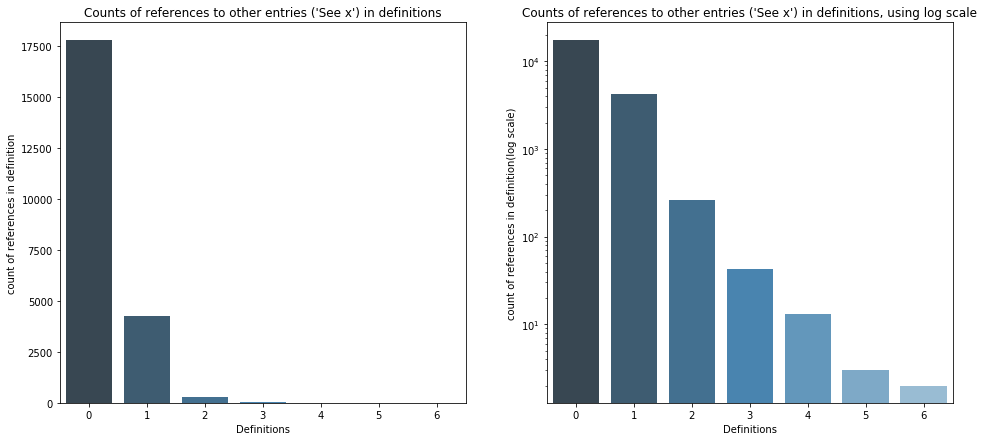

In [31]:
fig, ax = plt.subplots(1,2, figsize=(16, 7))
p = sns.countplot(x="refs_in_desc", data=first_ed_clean, ax=ax[0], palette="Blues_d")
p.set_xlabel('Definitions')
p.set_title("Counts of references to other entries ('See x') in definitions")
p2 = sns.countplot(x="refs_in_desc", data=first_ed_clean, ax=ax[1], palette="Blues_d")
p2.set_xlabel('Definitions')
p.set_ylabel("count of references in definition")
p2.set_title("Counts of references to other entries ('See x') in definitions, using log scale")
p2.set_yscale("log")
p2.set_ylabel("count of references in definition(log scale)")
# set y label

#plt.legend()
plt.show()

In this visualisation, we can see that most entries do not reference another entry in their definition. The second visualisation (using a log scale to better see the smaller values) shows that the values are an exponentially decreasing graph, meaning that a very small number of definitions will have very high numbers of references in them, and a very large number of them will have very few (or no) references. This gives us insight into how connected the entries in the encyclopaedia are, and can be useful for when comparing editions, to see if later editions are perhaps more connected.

### Most frequent words in first edition

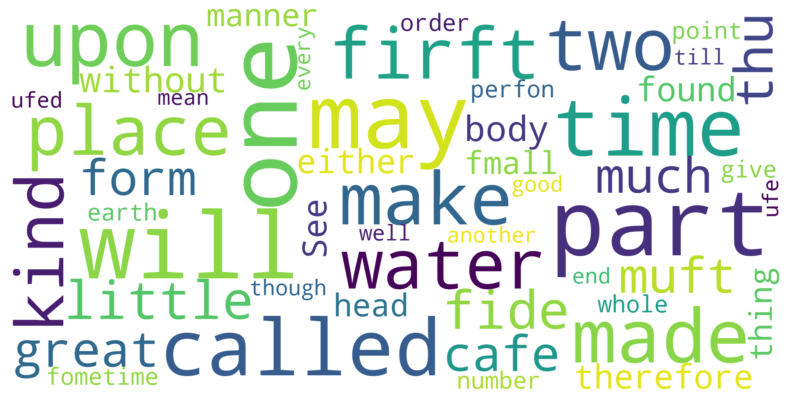

In [32]:
full_content = [] # text from all three volumes of the first edition

# adding most common misspelling of s as f to stopwords to be used in wordcloud
stopwords_s_to_f = []
for w in STOPWORDS:
    stopwords_s_to_f.append(re.sub("s", "f", w))
all_stopwords = STOPWORDS.union(stopwords_s_to_f)

stopwords = set(STOPWORDS) # to remove common stopwords

for index, row in first_ed.iterrows():

    #print("Reading: " + row['file'])
    f = open('text/' + row['file'], 'r', encoding="utf8")
    content = f.read()
    content = clean_up(content) 
    full_content.append(content)
    f.close()
    
full_content_str = ''.join(full_content)

wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", scale=5, stopwords=all_stopwords).generate(full_content_str)
fig = plt.figure(1, figsize=(14, 14))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

We notice that some of the words in the wordcloud are not of much significance (such as verbs/adjectives/other connecting words), as well as misspellings, which reduces the usefulness of this visualisation.
We do notice interesting words, such as "place" (probably since the Encyclopaedia mentions various names of places), "body"(which makes sense, as in the next visualisation, we can see that Anatomy is a popular topic), "See" (due to the large number of references to other entries in the Encyclopaedia), and "earth"/"water" (probably related to Agriculture, Botany, or Natural History, which are popular topics as based on the next visualisation)

### Most referenced entries

In [33]:
# Converting unique counts to a DataFrame for easy visualisation

all_refs = pd.DataFrame(refs)
popular_refs = all_refs[0].value_counts()
df_popular_refs = pd.DataFrame(popular_refs[:20]) # selecting just the top 20
df_popular_refs['references'] = df_popular_refs.index
df_popular_refs.columns = ['count', 'references']
df_popular_refs = df_popular_refs.reset_index(drop=True)
df_popular_refs.head()

,count,references
0,321,See Anatomy
1,151,See Law
2,131,See Medicine
3,119,See Chemistry
4,112,See Astronomy


c:\users\vaida\github\library\env\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


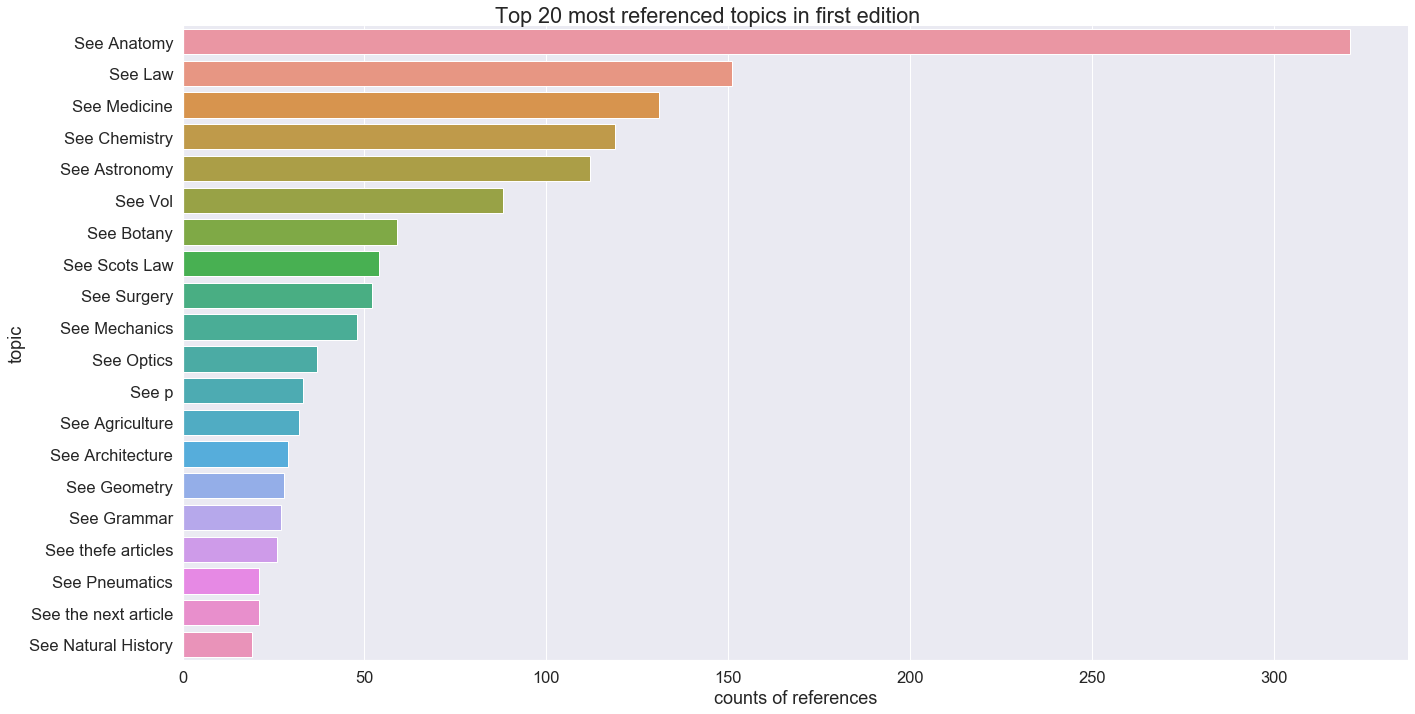

In [34]:
sns.set(font_scale=1.5)
ax = sns.catplot(x='count', y='references', data=df_popular_refs, kind='bar', size=10, aspect=2)
ax.fig.suptitle("Top 20 most referenced topics in first edition", y=1)
ax.set_axis_labels('counts of references', 'topic')

From this visualisation, we can see which topics are referenced the most in the first edition, which can be used to infer what topics were important, due to the number of entries mentioning them. The results are expected, with general topics such as Anatomy, Law, Medicine, Chemistry. However, some topics are more niche, such as pneumatics and optics, thus we can assume those fields were popular or researched at the time.

We do also see some entries not being topics, but instead, referencing parts of the Encyclopaedia itself ("See Vol", "See p.", "See thefe articles", "See the next article").

Another interesting aspect is that both Law and Scots law appear as separate topics, which matches the fact that the Encyclopaedia was compiled in Scotland.

## Reflection

We have learned that the definitions of entries in an Encyclopaedia are usually rather succinct (a few hundred characters), but there are some outliers. This would make sense as an Encyclopaedia is meant to be a summary of knowledge and easily browseable, but some entries might require deeper explanation.

We also notice that most entries do not reference other entries with a "See x", which indicates that most entries were deemed not linked closely enough to a topic to warrant a reference, which gives us insight into how knowledge is organised and connected in this specific Encyclopaedia, as well as the nature of the content: a lot of entries are referencing objects or places, which are not related to a specific topic.

We can also see that a lot of references are to "See Vol", "See p" and "See next article", which indicates that the Encyclopaedia is interconnected in different ways: through references to specific entries, as well as references to pages and volumes, which might be either references to figures, or broader references to longer-form articles.

We also learn more about the content in this first edition through the most common words and referenced topics, which indicate which fields were considered important and had been researched more deeply than others at the time.

### Hypotheses:
#### The topics that are most referenced in an edition reflect what fields were being explored at the time.
In the "Most referenced entries" visualisation, we mostly see broad topics such as "Agriculture", "Chemistry", "Medicine", but also more niche topics such as "Pneumatics" and "Optics". It is probable that that these more specific topics are prominent because those fields were being studied more intensely and more discoveries were being made about them during the time of the writing of this edition of the Encylopaedia.

I would test this by visualising the data for all editions, to check whether there are any changes in popularity of references to topics across time, and confirm this by researching the history of those fields around the time of the publications.

#### The Encyclopaedia is not an unbiased account of knowledge.
The words "good" and "great" both appear in the "Most frequent words in first edition" wordcloud: it would be valuable to investigate in what context they appear, and use sentiment analysis across the editions to investigate whether the editions have gotten more or less biased, what topics are the more/less biased, as well as which topics underwent the largest changes in bias.

#### There is a correlation between most popular words & most referenced topics
As mentioned in the description of the "Most frequent words in first edition" wordcloud, there seems to be a link between some of the most commonly mentioned words ("body", "earth", "water"), and the most referenced topics from the final visualisation ("Agriculture", "Botany", "Natural History"). It would be interesting to explore whether the change in popularity in topics influences the popularity of the most commonly referenced words that are related to a topic quite closely, making this a strong relationship between the two variables, or not.


#### Knowledge becomes more interlinked with each new edition.

In the "Distribution of references to other entries in definitions" visualisation, we can see that most entries in the first edition do not reference other entries, while those that do mostly reference one other topic. It would be valuable to visualise this data for all editions, to see whether the proportion changes: I would like to hypothesise that as time goes by, more knowledge is linked to existing topics and entries, rather than the addition of entirely new, unrelated concepts.